In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
my_data = pd.read_excel("Adops & Data Scientist Sample Data.xlsx",header=None, sheet_name=1)

my_data.columns = ['A','B','C']

my_data.head()

,A,B,C
0,0.490142,-0.179654,11.536508
1,-1.414793,-1.225605,11.828531
2,0.943066,4.506148,-3.235349
3,3.569090,5.068347,-23.891922
4,-1.702460,6.905051,-22.125437


In [4]:
my_data.describe()

,A,B,C
count,300.000000,300.000000,300.000000
mean,2.316688,2.012932,-41.567544
std,5.694549,2.998603,581.196205
min,-8.859235,-2.891623,-9999.000000
25%,-1.937274,-0.605841,-23.354257
50%,0.468780,1.935227,-3.087428
75%,7.041309,4.698202,16.303241
max,20.558194,6.997177,202.022916


## Simple Data Clearning
 - Remove unreasonable outlier 
 - Nornomlize the features

**It looks like we have some outliers need to be moved**

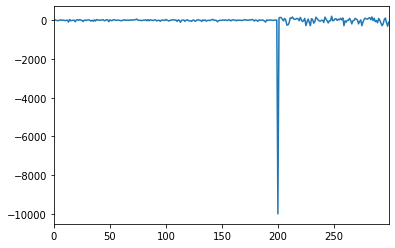

In [5]:
my_data['C'].plot()

In [6]:
my_data['C'].sort_values()

200   -9999.000000
298    -315.397489
229    -289.174093
259    -287.963053
275    -286.055387
          ...     
234     154.329356
242     155.383323
213     164.059058
284     164.705837
248     202.022916
Name: C, Length: 300, dtype: float64

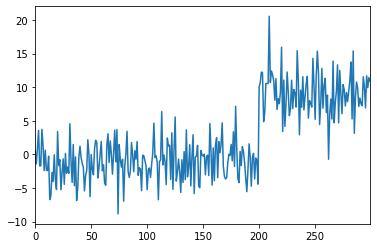

In [7]:
my_data['A'].plot()

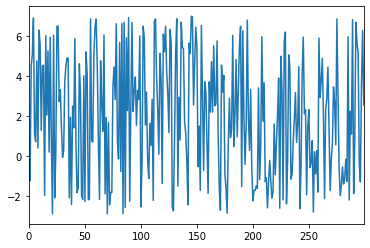

In [8]:
my_data['B'].plot()

**Remove the outlier in C**

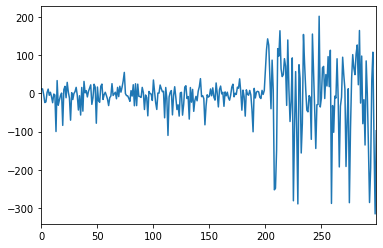

In [9]:
my_data=my_data.loc[my_data['C']!=-9999]

my_data['C'].plot()

**It looks like we need to normalize the data, to make it fit better into the regression model**

In [10]:
my_data = (my_data - my_data.mean())/my_data.std()
my_data.describe()

,A,B,C
count,2.990000e+02,2.990000e+02,2.990000e+02
mean,1.091657e-16,3.005771e-16,-6.832142e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.960846e+00,-1.643172e+00,-4.304892e+00
25%,-7.452383e-01,-8.732612e-01,-2.074655e-01
50%,-3.241695e-01,-2.771288e-02,7.464560e-02
75%,8.329796e-01,8.950715e-01,3.445237e-01
max,3.212531e+00,1.660287e+00,2.947482e+00


**Let's plot the 3D figure before decide which regression method should we chooce**

Text(0.5, 0, 'C')

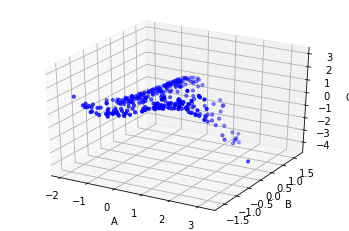

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(my_data['A'], my_data['B'], my_data['C'], c='blue',s=10)
X = my_data[['A', 'B', 'C']].values
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')

## Build The Regression to fit the data
**This plot loots closer to a degree-2 polynomial, So I decide to do a polynomial regression fit the data**


In [12]:
def Polynomial_Feature_Map(X1, X2):
#MAPFEATURE(X1, X2) maps the two input features
#   to quadratic features used in the regularization exercise.
#
#   Returns a new feature array with more features, comprising of 
#   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
#   for a total of 1 + 2 + ... + (degree+1) = ((degree+1) * (degree+2)) / 2 columns

    degree = 2
    out = np.ones(( X1.shape[0], sum(range(degree + 2)) )) # could also use ((degree+1) * (degree+2)) / 2 instead of sum
    curr_column = 1
    for i in range(1, degree + 1):
        for j in range(i+1):
            out[:,curr_column] = np.power(X1,i-j) * np.power(X2,j)
            curr_column += 1

    return out

In [16]:
X_train=Polynomial_Feature_Map(my_data['A'], my_data['B'])
X_train=pd.DataFrame(X_train)
X_train.drop(columns=0,axis=1,inplace=True)
X_train.head()

,1,2,3,4,5
0,-0.316656,-0.737210,0.100271,0.233442,0.543479
1,-0.651660,-1.086621,0.424660,0.708107,1.180745
2,-0.237004,0.828132,0.056171,-0.196271,0.685802
3,0.224811,1.015941,0.050540,0.228394,1.032136
4,-0.702249,1.629511,0.493154,-1.144323,2.655307


In [17]:
X_train=X_train.rename(columns={1: "A", 2:"B",3:"A*A",4:"A*B", 5:"B*B"})
X_train.head()

,A,B,A*A,A*B,B*B
0,-0.316656,-0.737210,0.100271,0.233442,0.543479
1,-0.651660,-1.086621,0.424660,0.708107,1.180745
2,-0.237004,0.828132,0.056171,-0.196271,0.685802
3,0.224811,1.015941,0.050540,0.228394,1.032136
4,-0.702249,1.629511,0.493154,-1.144323,2.655307


In [18]:
X = X_train #  features we use to predict C
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = my_data.iloc[:,2:3].values # the C value
theta = np.zeros([1,6])

#set hyper parameters
alpha = 0.01
iters = 1000

In [19]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [20]:
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

In [21]:
#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

[[ 0.04942514 -0.1300692  -0.72198832 -0.21299948 -0.6417807   0.04161632]]
0.11055169674679566


In [22]:
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g) # this is the theta value

[[ 0.04942514 -0.1300692  -0.72198832 -0.21299948 -0.6417807   0.04161632]]


In [23]:
finalCost = computeCost(X,y,g)
print(finalCost)

0.11055169674679566


Text(0.5, 1.0, 'Error vs. Training Epoch')

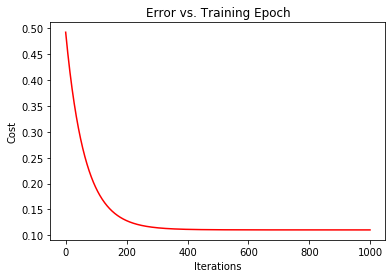

In [24]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

## Conclusion: 
- The polynomial regression gives us the $Theta$ as [ 0.04942514, -0.1300692, -0.72198832, -0.21299948, -0.6417807, 0.04161632]
- This mean $C$_hat= 0.04942514-0.1300692*$A$ -0.72198832*$B$ -0.2129994*$A^2$ - 0.6417807*$A*B$ + 0.04161632*$B^2$

## R square


In [25]:
#The Theto is g[0]
g[0]

array([ 0.04942514, -0.1300692 , -0.72198832, -0.21299948, -0.6417807 ,
        0.04161632])

In [26]:
X_train.head()

,A,B,A*A,A*B,B*B
0,-0.316656,-0.737210,0.100271,0.233442,0.543479
1,-0.651660,-1.086621,0.424660,0.708107,1.180745
2,-0.237004,0.828132,0.056171,-0.196271,0.685802
3,0.224811,1.015941,0.050540,0.228394,1.032136
4,-0.702249,1.629511,0.493154,-1.144323,2.655307


In [32]:
X_train['C']=my_data['C'].values


X_train['C_hat']=g[0][0]+g[0][1]*X_train['A']+g[0][2]*X_train['B']+g[0][3]*X_train['A*A']+g[0][4]*X_train['A*B']+g[0][5]*X_train['B*B']

X_train['difference']=X_train['C']-X_train['C_hat']

X_train['C-Cmean']=X_train['C']-X_train['C'].mean()

X_train.head()

,A,B,A*A,A*B,B*B,C,C_hat,difference,C-Cmean
0,-0.316656,-0.737210,0.100271,0.233442,0.543479,0.277547,0.474311,-0.196764,0.277547
1,-0.651660,-1.086621,0.424660,0.708107,1.180745,0.281640,0.422950,-0.141310,0.281640
2,-0.237004,0.828132,0.056171,-0.196271,0.685802,0.070499,-0.375110,0.445609,0.070499
3,0.224811,1.015941,0.050540,0.228394,1.032136,-0.219032,-0.827704,0.608672,-0.219032
4,-0.702249,1.629511,0.493154,-1.144323,2.655307,-0.194272,-0.295855,0.101583,-0.194272


In [36]:
#Square difference bewteen predicted and acture
sumdiff=(X_train['difference']**2).sum()

#squre difference between y and y mean:
sumdiff2=((X_train['C']-X_train['C'].mean())**2).sum() 

Rsquare= (sumdiff2-sumdiff)/sumdiff2
print(Rsquare)

0.7781546488101214


The R square looks good, which meas the regression suits the data well. 

**Regression Future fit the plot**

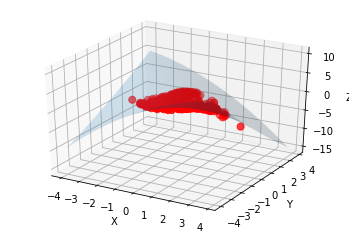

In [37]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# some 3-dim points
#mean = np.array([0.0,0.0,0.0])
#cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
data = my_data.values

# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(-4.0, 4.0, 0.2), np.arange(-4.0, 4.0, 0.2))
XX = X.flatten()
YY = Y.flatten()


# best-fit quadratic curve
A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
#C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
C=g[0]
# evaluate it on a grid
Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX**2,XX*YY,YY**2], C).reshape(X.shape)

# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')

#ax.axis('tight')
plt.show()

However, we can also try to fit the data with different degree with polynomial, just change the degree= 2 inside the polynomial function. Since the R^2 is 0.77, pretty high already. I only choose degree 2 to save the computing time. 